In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

Max Input Length 50
Max Output Length 18


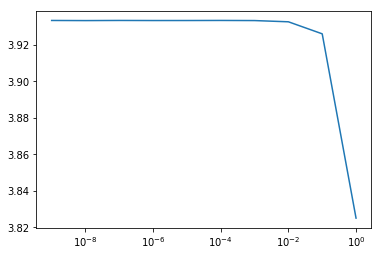

  Epochs    train_loss  
    1         3.8690    


    2         3.5115    


    3         2.8883    


    4         2.6729    


    5         2.1513    


    6         1.9686    


    7         1.7918    


    8         1.5002    


    9         1.3545    


    10        1.2864    


    11        1.2824    


    12        1.1262    


    13        1.0306    


    14        0.9835    


    15        0.9677    



In [3]:
import numpy as np
import tqdm
import torch
from torch import optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm_
import sys

train_ds = CHDataset("data/convex_hull_50_test.txt")
train_dl = DataLoader(train_ds, num_workers=2, batch_size=1024) 
model = PointerNet("LSTM", True, 1, 2, 128, 0.0)
runner = Runner(model=model, train_loader=train_dl, loss_fn=PointerNetLoss(), optimizer='adam')
runner.find_lr(plot=True)
runner.fit_cycle(5, lr=1e-2)

In [26]:
runner.fit_cycle(10, lr=1e-2)
model = runner.model

  Epochs    train_loss  
    1         0.5324    


    2         0.5803    


    3         0.5307    


    4         0.5342    


    5         0.5120    


    6         0.5043    


    7         0.5073    


    8         0.4948    


    9         0.4889    


    10        0.4862    


    11        0.4876    


    12        0.4801    


    13        0.4746    


    14        0.4703    


    15        0.4685    


    16        0.4681    


    17        0.4629    


    18        0.4579    


    19        0.4539    


    20        0.4513    


    21        0.4501    


    22        0.4535    


    23        0.4465    


    24        0.4415    


    25        0.4377    


    26        0.4349    


    27        0.4330    


    28        0.4320    


    29        0.4356    


    30        0.4321    


    31        0.4262    


    32        0.4221    


    33        0.4195    


    34        0.4166    


    35        0.4154    


    36        0.4146    


    37        0.4168    


    38        0.4128    


    39        0.4098    


    40        0.4056    


    41        0.4033    


    42        0.4012    


    43        0.3994    


    44        0.3985    


    45        0.3979    


    46        0.4009    


    47        0.3971    


    48        0.3949    


    49        0.3910    


    50        0.3886    


    51        0.3861    


    52        0.3849    


    53        0.3833    


    54        0.3825    


    55        0.3821    



In [27]:
(a, b, c), (d, e) = next(iter(train_dl))
print(a.shape, b.shape, c.shape, d.shape, e.shape, e[0, 0])
out = model(a.cuda(),b.cuda(),c.cuda())

torch.Size([1024, 51, 2]) torch.Size([1024, 1]) torch.Size([1024, 19, 2]) torch.Size([1024, 19]) torch.Size([1024, 1]) tensor(13)


In [28]:
a = a[0]
print(a.shape)

torch.Size([51, 2])


In [29]:
d = d[0]

In [30]:
d

tensor([ 2, 36, 38, 48, 50,  7,  3,  5, 25, 18, 13,  2,  0,  0,  0,  0,  0,  0,
         0])

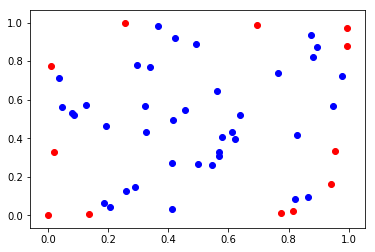

In [31]:
for i in range(len(a)):
    if i in d:
        plt.scatter(a[i][0], a[i][1], color='red')
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()

In [32]:
out = out[0]

In [33]:
c = out.argmax(-1)
print(c)

tensor([ 2, 36, 38, 48, 50,  7,  3,  5, 25, 18, 13,  2,  0,  0,  0,  0,  0,  0,
         0], device='cuda:0')


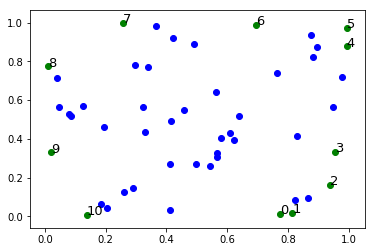

In [34]:
s = list(np.trim_zeros(d.numpy()))

for i in range(1, len(a)):
    if i in s:
        plt.scatter(a[i][0], a[i][1], color='green')
        plt.text(a[i][0], a[i][1], s.index(i), fontsize=13)
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()

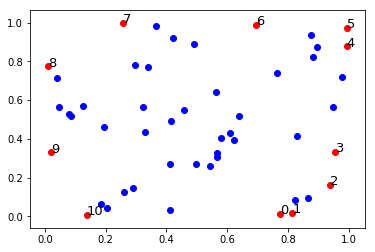

In [35]:
s = list(np.trim_zeros(c.cpu().numpy()))

for i in range(1, len(a)):
    if i in s:
        plt.scatter(a[i][0], a[i][1], color='red')
        plt.text(a[i][0], a[i][1], s.index(i), fontsize=13)
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()